## Methods: Examining Parallel Trends

This notebook examines the treatment and control group means on potential outcome variables of interest to see if trendlines in mean values over time are parallel to one another. Specifically, this notebook executes three steps:

1. Restructing the treatment and control group data, and oth outcomes

Visually examines parallel trends
2. Calculates slopes of each trendline to mathematically examine parallel trends


## Data Pre-Processing

The following code:

* Prepares the treatment and control group data
* Prepares the outcome variables data


In [1]:
import pandas as pd

# get relevant file paths ----

path_input_groups = '/Users/srilakshmi/Desktop/Thesis/04-Data-Analysis-Results/01-TC-Assignment/'
name_input_file_groups = 'Adm2_TC_Assignment_Recurrence.csv'

path_input_outcomevar = '/Users/srilakshmi/Desktop/Thesis/04-Data-Analysis-Results/00-Data-Sources/00-Cloud-to-Street/01-District-level/Data-Observational/'
name_input_file_outcomevar = 'Ghana_Stats_Rec_v2.csv'

path_output = '/Users/srilakshmi/Desktop/Thesis/04-Data-Analysis-Results/02-Parallel-Trends-Analysis/'
name_output_file = 'Before_After_Outcome_Variable_Of_Interest.csv'


In [2]:
# read in treatment and control group data demarcated using the Flood Risk Index ---
tot_flood_risk = pd.read_csv(path_input_groups+name_input_file_groups)

# read in observational flood-affected population and flood-affected cropland outcomes data
x = pd.read_csv(path_input_outcomevar+name_input_file_outcomevar)

# merge treatment and control group data and outcome variables data together ----
df = x.merge(tot_flood_risk, left_on='admin2name', right_on='Region')
df = df[['year', 'admin2name', 'pop_sum', 'crop_area', 'Treatment']]
df = df[df['year'] <2020]

# subset and groupby treatment and control group ---
control = df[df['Treatment'] == 0].groupby('year', as_index=False).mean()
treatment = df[df['Treatment'] == 1].groupby('year', as_index=False).mean()


In [4]:
# display subsets for demonstration purposes ---

control.head(5)

,year,pop_sum,crop_area,Treatment
0,1985,0.000000,0.000000,0
1,1986,0.752397,0.946358,0
2,1987,0.259259,0.238770,0
3,1988,0.000000,3.102284,0
4,1989,2.750000,1.793507,0


In [5]:
treatment.head(5)

,year,pop_sum,crop_area,Treatment
0,1985,0.000000,0.075435,1
1,1986,21.881736,8.226983,1
2,1987,18.958497,5.105738,1
3,1988,21.273856,181.591603,1
4,1989,45.137872,108.755188,1


### Visualize trendlines to examine parallel trends in average flood-affected population

The following code uses lineplots to visually compare the treatment and control datasets to determine if the lines of each group are parallel to one another.


In [29]:

def plot_trendlines(var, var_name): # function to plot trendlines
    
    sns.set_context("paper")
    sns.set_style("darkgrid")

    # plot treatment and control lines ---
    sns.lineplot(x = 'year', y = var, label='Treatment',color='navy', data=treatment, lw=3)
    sns.lineplot(x = 'year', y = var, label='Control', color='darkgreen', data=control, lw=3)

    # set plot details ----
    plt.title(var_name+' Over Time')
    plt.xlabel('Year')
    plt.ylabel(var_name)

    # add vertical lines to indicate program start and end years
    plt.axvline(2018, color='black', ls='--') 
    plt.axvline(2020, color='black', ls='--')
    ymin, ymax = ax.get_ylim() # get yaxis range to label vertical lines in an appropriate location
    plt.text(2018, (ymax - ymin)*0.3, '  Program Start')
    plt.text(2020, (ymax - ymin)*0.2, '  Program End')


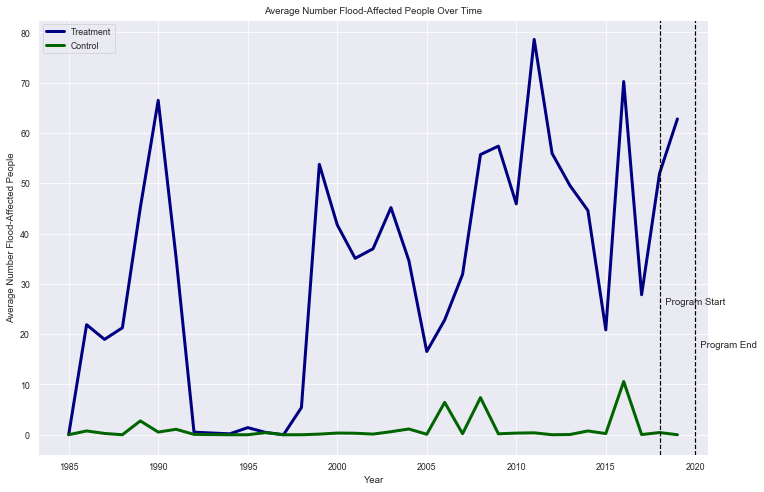

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# plot population impact
fig, ax = plt.subplots(figsize=(12, 8))
plot_trendlines('pop_sum', 'Average Number Flood-Affected People')


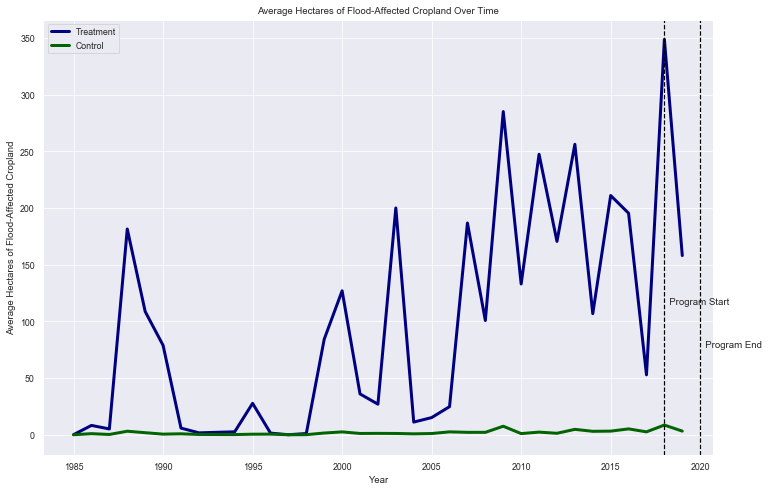

In [31]:
# plot cropland impact

fig, ax = plt.subplots(figsize=(12, 8))
plot_trendlines('crop_area', 'Average Hectares of Flood-Affected Cropland')


### Calculate slopes of each line segment to mathematically confirm a lack of parallel trends

The following code uses the point-slope form of the equation of a line to calculate the slope of each line segment in the visualizations above. Equivalent slopes between the treatment and control group lines would indicate parallel trends.


In [33]:
# define the slope formula using the point slope form of a line ---

def slope(x1, y1, x2, y2):
    m = (y2-y1)/(x2-x1)
    return m


In [43]:
outcome_var = ['pop_sum', 'crop_area'] # variables to calculate slopes on
fancy_names = ['Average Number of Flood-Affected People', 'Average Hectares of Flood-Affected Cropland']

for i in range(0, len(outcome_var)):

    x1 = treatment['year'].to_numpy() # get years data in vector form (x values in the slope equation)
    y1 = treatment[outcome_var[i]].to_numpy() # get outcomes data in vector form (y values in the slope equation)
    lst = [] # initialize empty list to store slopes for treatment group
    for j in range(0, len(treatment)-1):
        lst.append(slope(x1[j], y1[j], x1[j+1], y1[j+1])) # calculate slopes for treatment groups
    treatment['slope'] = pd.Series(lst) # append slopes as column to the treatment df

    x1 = control['year'].to_numpy() # repeat above process for the control group
    y1 = control[outcome_var[i]].to_numpy()
    lst = []
    for j in range(0, len(treatment)-1):
        lst.append(slope(x1[j], y1[j], x1[j+1], y1[j+1]))
    control['slope'] = pd.Series(lst)
    
    # get slopes for a given outcome var
    x = pd.concat((control['year'],treatment['slope'], control['slope']),axis=1)
    x.columns = ['start_year', 'm_T', 'm_C']
    
    # display slopes for each outcome var
    print('Slope calculations for the outcome variable '+fancy_names[i]+":")
    print('\n')
    print(x)
    print('\n')
    

Slope calculations for the outcome variable Average Number of Flood-Affected People:


    start_year        m_T        m_C
0         1985  21.881736   0.752397
1         1986  -2.923239  -0.493137
2         1987   2.315359  -0.259259
3         1988  23.864016   2.750000
4         1989  21.368119  -2.222222
5         1990 -31.330065   0.555556
6         1991 -34.666667  -1.018519
7         1992  -0.166667  -0.032407
8         1994   1.240450   0.000000
9         1995  -0.953704   0.416667
10        1996  -0.462672  -0.416667
11        1997   5.405919   0.000000
12        1998  48.371097   0.122767
13        1999 -12.036783   0.212963
14        2000  -6.659368  -0.036601
15        2001   1.902324  -0.171242
16        2002   8.187073   0.475054
17        2003 -10.528032   0.538344
18        2004 -18.088453  -1.048693
19        2005   6.267357   6.344989
20        2006   9.062781  -6.232789
21        2007  23.833043   7.174837
22        2008   1.676107  -7.194444
23        2009 -11.476906